<a href="https://colab.research.google.com/github/YunseoChoe/2025-ASW-LLM/blob/main/asw_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),  # 16 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, padding=1),  # 32 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1),  # 64 x 28 x 28
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2)  # 64 x 14 x 14
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),  # 128 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, 3, padding=1),  # 256 x 7 x 7
            nn.ReLU()
        )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        batch_size = x.size(0)
        out = out.view(batch_size, -1)
        return out

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, 2, 1, 1),  # 128 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, 1, 1),  # 64 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64, 16, 3, 1, 1),  # 16 x 14 x 14
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 1, 3, 2, 1, 1),  # 1 x 28 x 28
            nn.Sigmoid()
        )

    def forward(self, x):
        batch_size = x.size(0)
        out = x.view(batch_size, 256, 7, 7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

In [ ]:
mnist_train = dset.MNIST("./data/MNIST", train=True,
                         transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False,
                        transform=transforms.ToTensor(), download=True)

batch_size = 100
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=0, drop_last=True)

num_epoch = 10
learning_rate = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = Encoder().to(device)
decoder = Decoder().to(device)

parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.04MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.68MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.5MB/s]


loss is 0.25335079431533813
torch.Size([100, 28, 28])


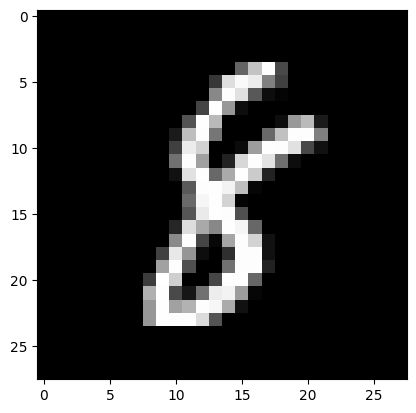

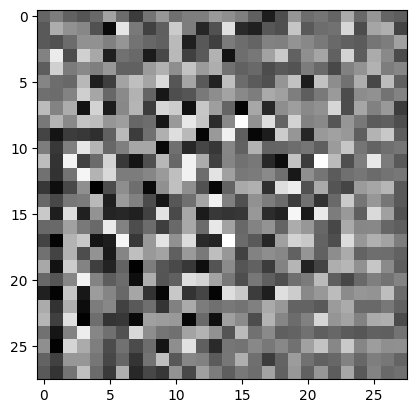

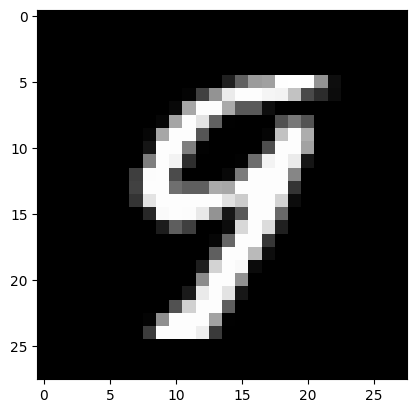

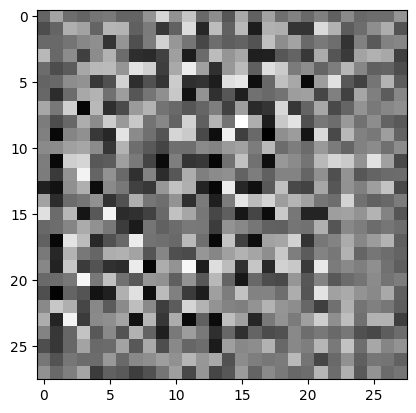

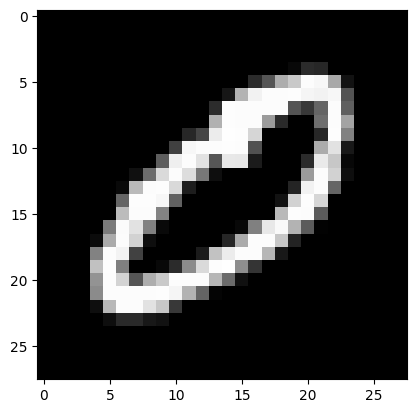

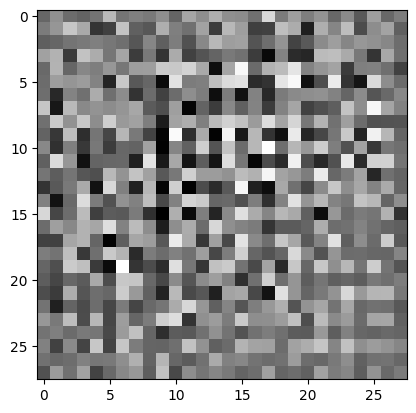

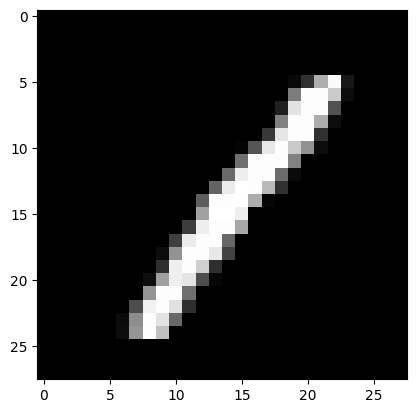

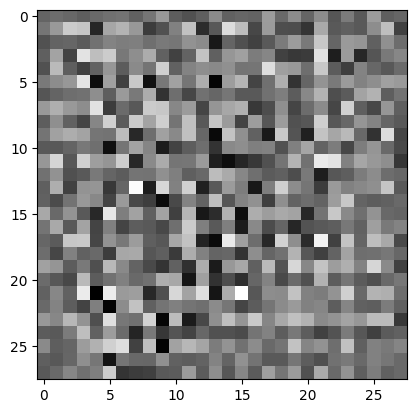

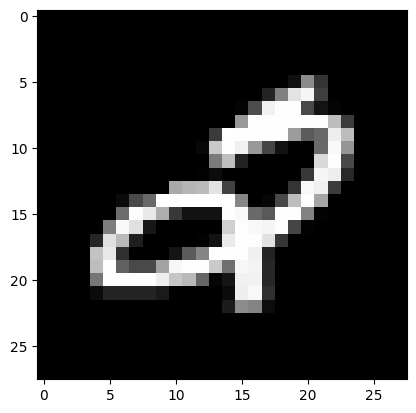

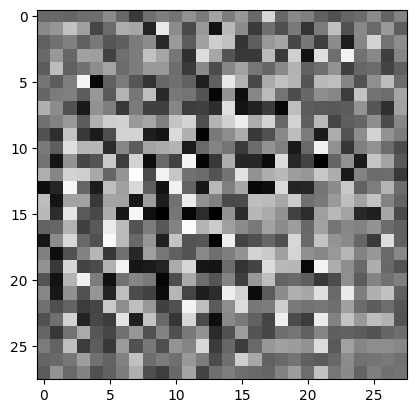

In [ ]:
for i in range(1):
  for j,[image, label] in enumerate(test_loader):
    image = image.to(device)
    z = encoder(image)
    output = decoder(z)
    loss = loss_func(output,image)
# if j % 10 == 0:
# print(loss)
  print("loss is", loss.cpu().item())

out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()

Epoch [1/10]
Epoch [1/10]
Epoch [1/10]
Epoch [1/10]
Epoch [1/10]
Epoch [1/10]
Epoch [2/10]
Epoch [2/10]
Epoch [2/10]
Epoch [2/10]
Epoch [2/10]
Epoch [2/10]
Epoch [3/10]
Epoch [3/10]
Epoch [3/10]
Epoch [3/10]
Epoch [3/10]
Epoch [3/10]
Epoch [4/10]
Epoch [4/10]
Epoch [4/10]
Epoch [4/10]
Epoch [4/10]
Epoch [4/10]
Epoch [5/10]
Epoch [5/10]
Epoch [5/10]
Epoch [5/10]
Epoch [5/10]
Epoch [5/10]
Epoch [6/10]
Epoch [6/10]
Epoch [6/10]
Epoch [6/10]
Epoch [6/10]
Epoch [6/10]
Epoch [7/10]
Epoch [7/10]
Epoch [7/10]
Epoch [7/10]
Epoch [7/10]
Epoch [7/10]
Epoch [8/10]
Epoch [8/10]
Epoch [8/10]
Epoch [8/10]
Epoch [8/10]
Epoch [8/10]
Epoch [9/10]
Epoch [9/10]
Epoch [9/10]
Epoch [9/10]
Epoch [9/10]
Epoch [9/10]
Epoch [10/10]
Epoch [10/10]
Epoch [10/10]
Epoch [10/10]
Epoch [10/10]
Epoch [10/10]
loss is 0.00036512117367237806
torch.Size([100, 28, 28])


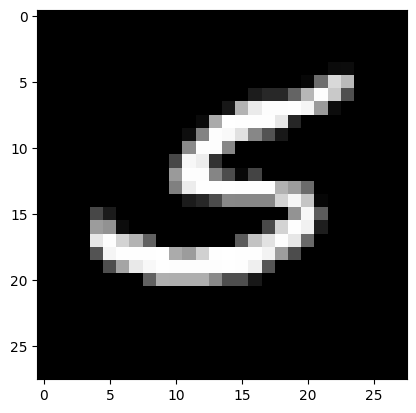

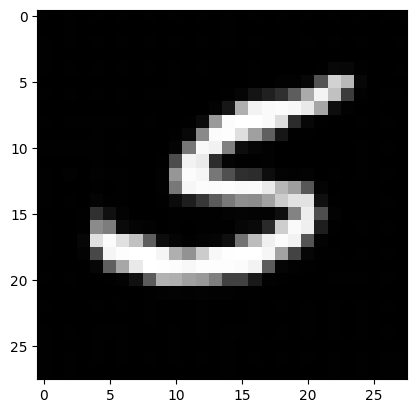

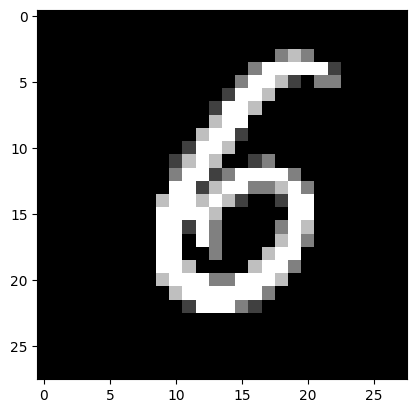

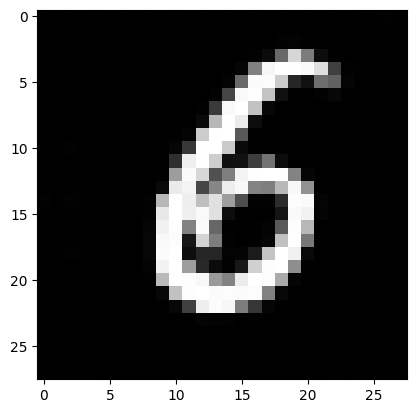

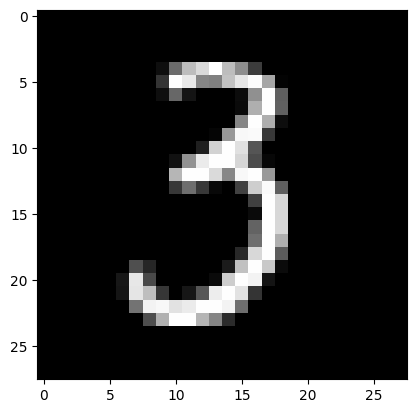

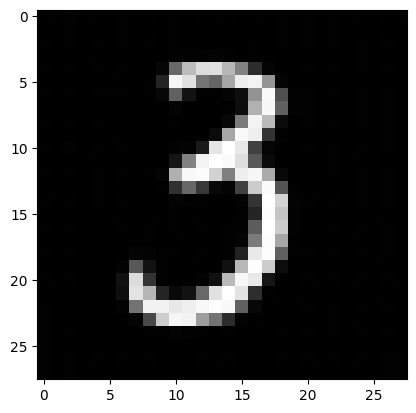

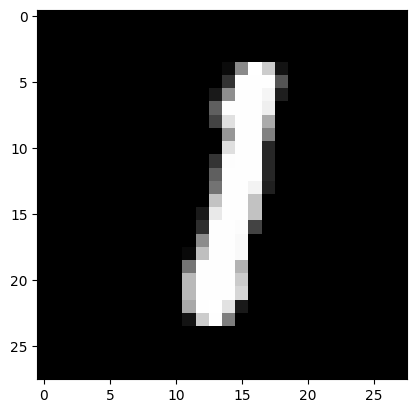

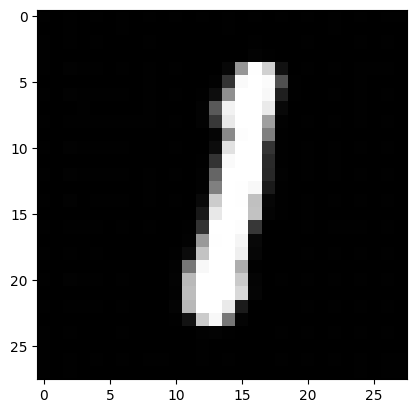

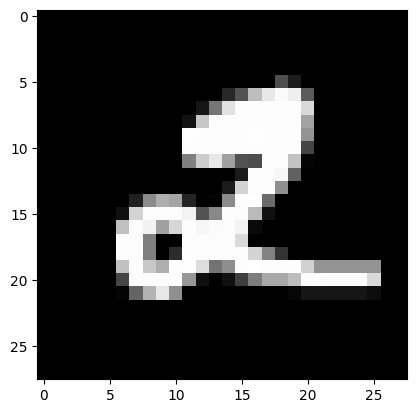

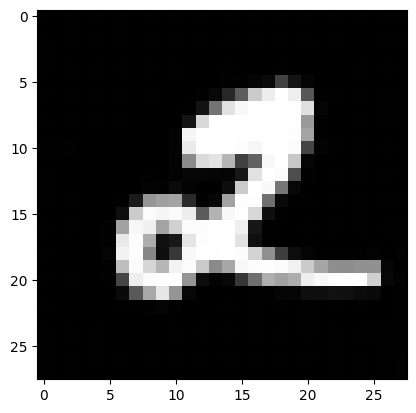

In [ ]:
for i in range(num_epoch):
  for j,[image, label] in enumerate(train_loader):
    optimizer.zero_grad()
    image = image.to(device)
    z = encoder(image)
    output = decoder(z)
    loss = loss_func(output, image)
    loss.backward()
    optimizer.step()

    if (j + 1) % 100 == 0:
            print(f"Epoch [{i+1}/{num_epoch}]")
print("loss is", loss.cpu().item())

out_img = torch.squeeze(output.cpu().data)
print(out_img.size())
for i in range(5):
  plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
  plt.show()
  plt.imshow(out_img[i].numpy(),cmap='gray')
  plt.show()